In [ ]:
Design a pumping main to transport 1 MLD of water over a distance of 3.0 km. The static lift is
10.0 m. Pumping need not be carried out throughout the day. The power cost is Rs. 5/- per kWhr.
Assume that you can fabricate a pipe of any given diameter. Pump efficiency can be taken as
65%.
You have a choice of two materials for pipes:
Choice-I:
Hazen-Williams coefficient, C = 100.
You can build a cost function for the cost of pipe per unit length for the above pipe from the
following data:
Pipe Cost per unit length:

Diameter 150 mm: Rs. 2459/-
Diameter 200 mm: Rs. 2868/-
Diameter 250 mm: Rs. 3617/-

Choice-II:
Hazen-Williams coefficient, C = 120.
You can build a cost function for the cost of pipe per unit length for the above pipe from the
following data:
Pipe Cost per unit length:

Diameter 150 mm: Rs. 3000/-
Diameter 200 mm: Rs. 3600/-
Diameter 250 mm: Rs. 4200/-

The system needs to be designed for a life of 40 years and the interest rate is 12%.
Determine:

Material of the pipe
Diameter of the pipe
Number of hours of operation per day
Pumping head required

In [ ]:
Diameter (x)   Cost/Length (y)
150            2459
200            2868
250            3617


Optimized parameters:
a = 48.49737147540595
c = 0.7779828857801996
Optimized parameters with adjusted initial parameters:
a = 48.49737666433117
c = 0.7779828657730166


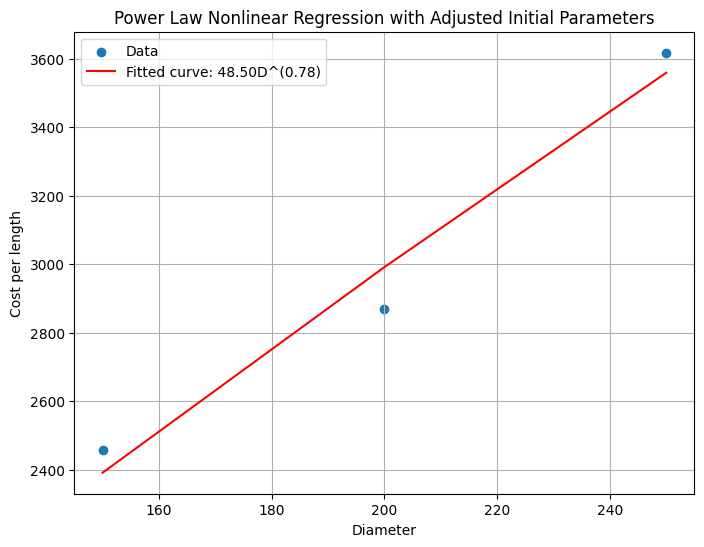

In [11]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Given data
diameter = np.array([150, 200, 250])  # Diameter
cost_per_length = np.array([2459, 2868, 3617])  # Cost per length

# Define the power-law function
def power_law(d, a, c):
    return a * d**c

# Perform nonlinear regression
popt, pcov = curve_fit(power_law, diameter, cost_per_length)

# Extract optimized parameters
a_opt, c_opt = popt

# Print optimized parameters
print("Optimized parameters:")
print("a =", a_opt)
print("c =", c_opt)
# Perform nonlinear regression with adjusted initial parameters
popt, pcov = curve_fit(power_law, diameter, cost_per_length, p0=(2500, 0.5))

# Extract optimized parameters
a_opt, c_opt = popt

# Print optimized parameters
print("Optimized parameters with adjusted initial parameters:")
print("a =", a_opt)
print("c =", c_opt)

# Plot the data and fitted curve with adjusted initial parameters
plt.figure(figsize=(8, 6))
plt.scatter(diameter, cost_per_length, label='Data')
plt.plot(diameter, power_law(diameter, *popt), color='red', label='Fitted curve: {:.2f}D^({:.2f})'.format(*popt))
plt.xlabel('Diameter')
plt.ylabel('Cost per length')
plt.title('Power Law Nonlinear Regression with Adjusted Initial Parameters')
plt.legend()
plt.grid(True)
plt.show()


Optimized parameters:
a = 109.15624020447551
c = 0.6607090990644506
Optimized parameters with adjusted initial parameters:
a = 109.15624003978779
c = 0.6607090993464326


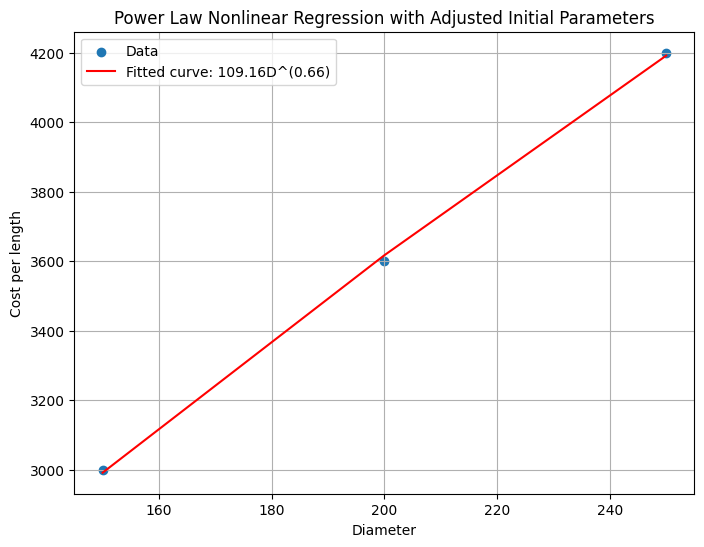

In [15]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Given data
diameter = np.array([150, 200, 250])  # Diameter
cost_per_length = np.array([3000, 3600, 4200])  # Cost per length

# Define the power-law function
def power_law(d, a, c):
    return a * d**c

# Perform nonlinear regression
popt, pcov = curve_fit(power_law, diameter, cost_per_length)

# Extract optimized parameters
a_opt, c_opt = popt

# Print optimized parameters
print("Optimized parameters:")
print("a =", a_opt)
print("c =", c_opt)
# Perform nonlinear regression with adjusted initial parameters
popt, pcov = curve_fit(power_law, diameter, cost_per_length, p0=(2500, 0.5))

# Extract optimized parameters
a_opt, c_opt = popt

# Print optimized parameters
print("Optimized parameters with adjusted initial parameters:")
print("a =", a_opt)
print("c =", c_opt)

# Plot the data and fitted curve with adjusted initial parameters
plt.figure(figsize=(8, 6))
plt.scatter(diameter, cost_per_length, label='Data')
plt.plot(diameter, power_law(diameter, *popt), color='red', label='Fitted curve: {:.2f}D^({:.2f})'.format(*popt))
plt.xlabel('Diameter')
plt.ylabel('Cost per length')
plt.title('Power Law Nonlinear Regression with Adjusted Initial Parameters')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import numpy as np
from scipy.optimize import fsolve

# Given values
a = 10463.26
m = 0.78
Q = 0.011574
C = 100

# Define the equation
def equation(D):
    return (2.094 * 10**11 * Q * Q**1.852 * -4.87)/(C**1.852 * D**5.87) + 3000 * a * D**m

# Solve for D
D_solution = fsolve(equation, 1)  # Initial guess is 1

print("Solution for D:", D_solution[0])


Solution for D: 1.0


C:\Users\wasee\AppData\Local\Temp\ipykernel_111572\2723848383.py:12: RuntimeWarning: invalid value encountered in power
  return (2.094 * 10**11 * Q * Q**1.852 * -4.87)/(C**1.852 * D**5.87) + 3000 * a * D**m
C:\Users\wasee\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [9]:
import numpy as np
from scipy.optimize import fsolve

# Constants
Q = 0.01157407
a = 10475.53
C = 120
m = 0.66

# Define the function to solve
def equation(D):
    term1 = (2.094 * 10**11 * Q * Q**1.852 * -4.87) / (C**1.852 * D**5.87)
    term2 = 3000 * a * D**m
    return term1 + term2

# Ensure initial guess is positive
D_initial_guess = 1.0

# Ensure solution stays positive
def positive_equation(D):
    return equation(np.abs(D))

# Solve for D using positive_equation to ensure D is positive
D_solution = fsolve(positive_equation, D_initial_guess)

# Ensure the solution is positive
D_solution = np.abs(D_solution)

print("The value of D is:", D_solution[0])


The value of D is: 0.18004428426547694


In [13]:
def equation(D, Q, a, m, C):
    return (2.094 * 10 ** 11 * Q * Q ** 1.852 * -4.87) / (C ** 1.852 * D ** 5.87) + 3000 * a * D ** m

def derivative(D, Q, a, m, C):
    return -5.87 * (2.094 * 10 ** 11 * Q * Q ** 1.852 * -4.87) / (C ** 1.852 * D ** 6.87) + 3000 * a * m * D ** (m - 1)

def newton_raphson(Q, a, m, C, initial_guess=1.0, tolerance=1e-6, max_iterations=1000):
    D = initial_guess
    try:
        for _ in range(max_iterations):
            f_value = equation(D, Q, a, m, C)
            if abs(f_value) < tolerance:
                return D
            f_derivative = derivative(D, Q, a, m, C)
            if f_derivative == 0:
                break
            D = D - f_value / f_derivative
    except (ZeroDivisionError, ValueError):
        return None
    return None  # No root found within the maximum number of iterations

def cost(Q, D, a, C):
    return 6539389.804 * Q * (10 + (32034 * Q ** 1.852)) / (C ** 1.854 * D ** 4.87) + 3000 * a * D

a = 10475.53
m = 0.66
C = 120

min_cost = float('inf')
min_Q = None
for Q in range(int(Q * 100000), 0, -1):  # Iterate over all values less than the given Q
    Q /= 100000
    D = newton_raphson(Q, a, m, C)
    if D is not None:
        total_cost = cost(Q, D, a, C)
        if not isinstance(total_cost, complex) and not isinstance(total_cost, str) and total_cost < min_cost:
            min_cost = total_cost
            min_Q = Q

if min_Q is not None:
    print("The value of Q where cost is minimum:", min_Q)
    print("The minimum cost:", min_cost)
else:
    print("Failed to find a solution.")


Failed to find a solution.


Optimized parameters:
a = 48.49737147540595
c = 0.7779828857801996


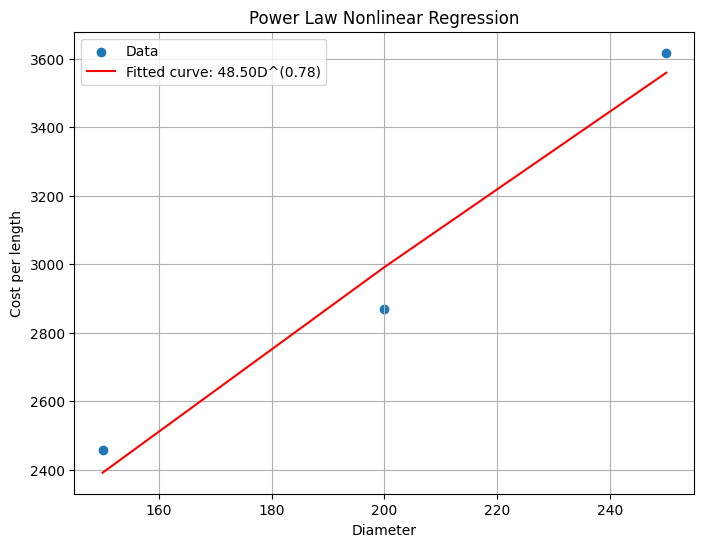

In [16]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Given data
diameter = np.array([150, 200, 250])  # Diameter
cost_per_length = np.array([2459, 2868, 3617])  # Cost per length

# Define the power-law function
def power_law(d, a, c):
    return a * d**c

# Perform nonlinear regression
popt, pcov = curve_fit(power_law, diameter, cost_per_length)

# Extract optimized parameters
a_opt, c_opt = popt

# Print optimized parameters
print("Optimized parameters:")
print("a =", a_opt)
print("c =", c_opt)

# Plot the data and fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(diameter, cost_per_length, label='Data')
plt.plot(diameter, power_law(diameter, *popt), color='red', label='Fitted curve: {:.2f}D^({:.2f})'.format(*popt))
plt.xlabel('Diameter')
plt.ylabel('Cost per length')
plt.title('Power Law Nonlinear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import numpy as np
from scipy.optimize import minimize

# Constants
a = 10475
C = 120
m = 0.66
max_Q = 0.01157*(1/24)  # Upper bound for Q
min_D = 1e-6  # Minimum value for D
epsilon = 1e-9  # Small positive value to avoid division by zero

# Cost function
def cost_function(D, Q):
    term1 = 6539389.804 * Q * (10 + (32034 * Q ** 1.852)) / (C ** 1.854 * D ** 4.87)
    term2 = 3000 * a * D ** m
    return term1 + term2

# Objective function to minimize
def objective(D_Q):
    D, Q = D_Q
    return cost_function(D, Q)

# Bounds for D and Q
bounds_D = (min_D, None)
bounds_Q = (1e-6, max_Q)
bounds = [bounds_D, bounds_Q]

# Initial guess
initial_guess = [min_D, max_Q]

# Perform minimization
result = minimize(objective, initial_guess, bounds=bounds)

# Extract optimal D and corresponding cost
optimal_D, optimal_Q = result.x
optimal_cost = result.fun

# Print the results
print("Optimal D:", optimal_D)
print("Corresponding Q:", optimal_Q)
print("Optimal cost:", optimal_cost)


Optimal D: 0.027067569515966866
Corresponding Q: 1e-06
Optimal cost: 3295247.4471208965


In [17]:
import numpy as np
from scipy.optimize import minimize

# Constants
a = 10475
C = 120
m = 0.66
max_Q = 0.01157  # Upper bound for Q
min_D = 1e-6  # Minimum value for D
epsilon = 1e-9  # Small positive value to avoid division by zero

# Cost function
def cost_function(D, Q):
    term1 = 6539389.804 * Q * (10 + (32034 * Q ** 1.852)) / (C ** 1.854 * D ** 4.87)
    term2 = 3000 * a * D ** m
    return term1 + term2

# Objective function to minimize
def objective(D_Q):
    D, Q = D_Q
    return cost_function(D, Q)

# Bounds for D and Q
bounds_D = (min_D, None)
bounds_Q = (1e-6, max_Q)
bounds = [bounds_D, bounds_Q]

# Initial guess
initial_guess = [min_D, max_Q]

# Perform minimization
result = minimize(objective, initial_guess, bounds=bounds)

# Extract optimal D and corresponding cost
optimal_D, optimal_Q = result.x
optimal_cost = result.fun

# Print the results
print("Optimal D:", optimal_D)
print("Corresponding Q:", optimal_Q)
print("Optimal cost:", optimal_cost)


Optimal D: 0.02706757191791146
Corresponding Q: 1e-06
Optimal cost: 3295247.44712073
